In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-07-19 08:36:27--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2023-07-19 08:36:27 (195 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [5]:
import json
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

with open("/content/sarcasm.json",'r') as f:
  datastore = json.load(f)

senstences=[]
labels=[]

for item in datastore:
  senstences.append(item['headline'])
  labels.append(item['is_sarcastic'])

print(len(senstences))

training_size = 20000

vocab_size = 10000
max_length = 32
embedding_dim = 16

training_sentences = senstences[0:training_size]
testing_sentences = senstences[training_size:]

training_labels = labels[0:training_size]
testing_lables = labels[training_size:]




26709


In [6]:

padding_type='post'
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_seqs = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_seqs, maxlen = max_length, padding = padding_type, truncating=trunc_type)

testing_seqs = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_seqs, maxlen = max_length, padding = padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_lables)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.SimpleRNN(3, return_sequences=True),
    tf.keras.layers.SimpleRNN(3),

    tf.keras.layers.Dense(1, activation ='sigmoid')
])


In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 32, 16)            160000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32, 3)             60        
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 160,085
Trainable params: 160,085
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
625/625 - 7s - loss: 0.5082 - acc: 0.7603 - val_loss: 0.4392 - val_acc: 0.8077 - 7s/epoch - 11ms/step
Epoch 2/30
625/625 - 7s - loss: 0.3275 - acc: 0.8693 - val_loss: 0.4340 - val_acc: 0.8122 - 7s/epoch - 12ms/step
Epoch 3/30
625/625 - 6s - loss: 0.2346 - acc: 0.9129 - val_loss: 0.4102 - val_acc: 0.8328 - 6s/epoch - 10ms/step
Epoch 4/30
625/625 - 6s - loss: 0.1718 - acc: 0.9398 - val_loss: 0.4620 - val_acc: 0.8258 - 6s/epoch - 10ms/step
Epoch 5/30
625/625 - 5s - loss: 0.1293 - acc: 0.9570 - val_loss: 0.4884 - val_acc: 0.8244 - 5s/epoch - 8ms/step
Epoch 6/30
625/625 - 6s - loss: 0.1045 - acc: 0.9656 - val_loss: 0.5171 - val_acc: 0.8256 - 6s/epoch - 9ms/step
Epoch 7/30
625/625 - 5s - loss: 0.0853 - acc: 0.9740 - val_loss: 0.5524 - val_acc: 0.8252 - 5s/epoch - 9ms/step
Epoch 8/30
625/625 - 6s - loss: 0.0787 - acc: 0.9744 - val_loss: 0.5895 - val_acc: 0.8182 - 6s/epoch - 10ms/step
Epoch 9/30
625/625 - 5s - loss: 0.0649 - acc: 0.9804 - val_loss: 0.6157 - val_acc: 0.8171 - 5s/epoc

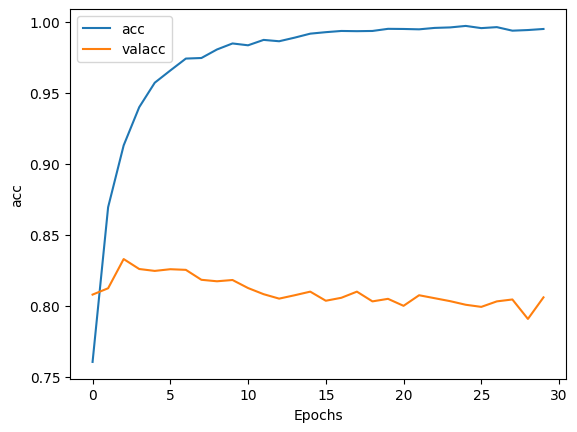

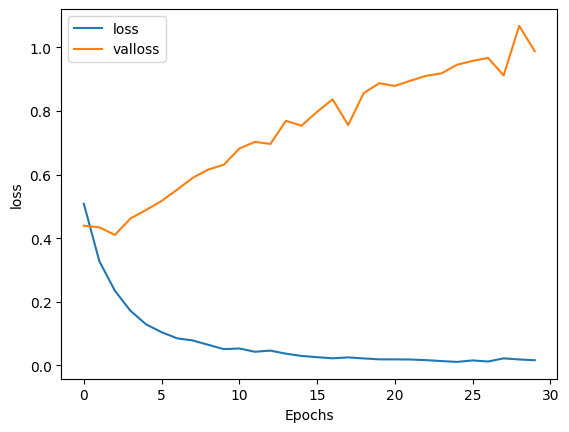

In [24]:
model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics=['acc'])

history = model.fit(training_padded, training_labels, epochs = 30, validation_data=(testing_padded, testing_labels), verbose =2)

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [25]:
test_sen = ['tom starting to fear spiders in the garden might be real', 'the weather today is bright and sunny']
test_seq = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding = padding_type, truncating=trunc_type)

model.predict(test_padded)

1/1 [==============================] - 0s 181ms/step


array([[0.9059645 ],
       [0.00118977]], dtype=float32)